<a href="https://colab.research.google.com/github/vikidish/stepik_50352/blob/master/Lesson_5_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

0it [00:00, ?it/s]

9920512it [00:03, 3287761.75it/s]                            


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 48611.36it/s]                           
0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:02, 719510.10it/s]                             
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 18431.22it/s]            

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [0]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

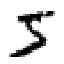

In [0]:
from PIL import Image, ImageOps

img, _ = MNIST_train[0]
img = img.convert('L')
img = ImageOps.invert(img)
# img = img.convert('1')

display(img.resize((64,64)))


In [0]:
X_train = X_train.float()
X_test = X_test.float()

In [0]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [0]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

In [0]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])


In [0]:
X_train[0]

In [0]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [0]:
torch.cuda.is_available()

True

In [0]:
!nvidia-smi

Fri Aug  2 13:07:44 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    29W /  70W |   2629MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
# list(mnist_net.parameters())

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(mnist_net.parameters(), lr=1.0e-3)

In [0]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(1000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        # transfer to device
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

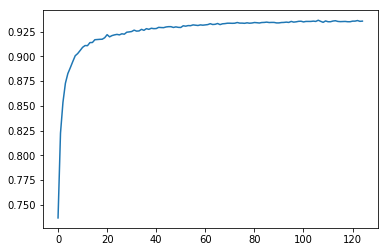

In [0]:
plt.plot(test_accuracy_history)


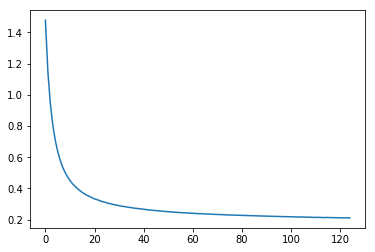

In [0]:
plt.plot(test_loss_history);

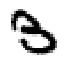

In [0]:
from PIL import Image, ImageOps

img, _ = MNIST_test[18]
img = img.convert('L')
img = ImageOps.invert(img)
# img = img.convert('1')

display(img.resize((64,64)))

Img #8
Model pred: 6
Real data: 5


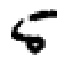

Img #33
Model pred: 6
Real data: 4


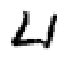

Img #63
Model pred: 2
Real data: 3


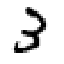

Img #73
Model pred: 7
Real data: 9


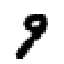

Img #124
Model pred: 4
Real data: 7


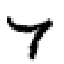

Img #149
Model pred: 4
Real data: 2


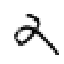

Img #193
Model pred: 3
Real data: 9


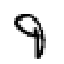

Img #195
Model pred: 8
Real data: 3


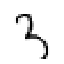

Img #211
Model pred: 7
Real data: 5


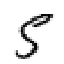

Img #233
Model pred: 7
Real data: 8


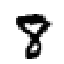

Img #241
Model pred: 8
Real data: 9


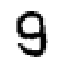

Img #245
Model pred: 5
Real data: 3


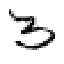

Img #247
Model pred: 2
Real data: 4


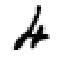

Img #259
Model pred: 0
Real data: 6


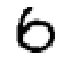

Img #290
Model pred: 4
Real data: 8


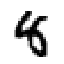

Img #300
Model pred: 6
Real data: 4


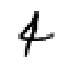

Img #320
Model pred: 7
Real data: 9


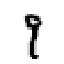

Img #321
Model pred: 7
Real data: 2


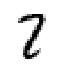

Img #340
Model pred: 3
Real data: 5


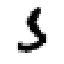

Img #352
Model pred: 0
Real data: 5


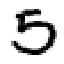

In [0]:
from PIL import Image, ImageOps

def show_wrong(test_preds, test_real, start=0, limit=10):
  wrongs_preds = (test_preds.argmax(dim=1) != test_real)
  wrongs_preds_ind = wrongs_preds.nonzero()
  
  for i in wrongs_preds_ind[start:start+limit]:
    i = int(i)
#     break
    print("Img " + str(i))
    print("Model pred: " + str(int(test_preds.argmax(dim=1)[i])))
    print("Real data: " + str(int(test_real[i])))
    img, _ = MNIST_test[i]
    img = img.convert('L')
    img = ImageOps.invert(img)
    # img = img.convert('1')

    display(img.resize((64,64)))
          

show_wrong(test_preds, y_test, start=0, limit=20)